# 1. Titanic

## 1.1 Cargar entorno y archivos
El dataset de entrenamiento (train.csv) contiene 891 registros y la variable objetivo Survived, que indica si el pasajero sobrevivió (1) o no (0).

El dataset de test (test.csv) contiene 418 registros y no incluye la variable Survived → mi modelo deberá predecir este valor.

In [ ]:
# Librerías para manejo de datos
import pandas as pd
import numpy as np 

# Librerías para mi visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de los gráficos
#%matplotlib inline
#sns.set_style('whitegrid')

# Librerías para el modelado
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Definir la ruta donde tengo los CSV
data_path = r"C:\Users\kevin.vargas\Desktop\ds_kevin_vargas\0_titanic\data"

# Cargar los datasets
train_df = pd.read_csv(f"{data_path}\\train.csv")
test_df = pd.read_csv(f"{data_path}\\test.csv")

# Mostrar primeras filas del train
print("Train dataset:")
display(train_df)

# Mostrar primeras filas del test
print("Test dataset:")
display(test_df)
train_df


Train dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Test dataset:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## 1.2 Análisis exploratorio

### Información general

In [6]:
# Información general del dataset
print("Train dataset info:")
train_df.info()

Train dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
print("\nTest dataset info:")
test_df.info()


Test dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
# Resumen estadístico de las variables numéricas
print("Train dataset - Statistical summary:")
display(train_df.describe())

print("\nTest dataset - Statistical summary:")
display(test_df.describe())


Train dataset - Statistical summary:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Test dataset - Statistical summary:


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Distribucion de la variable objetivo

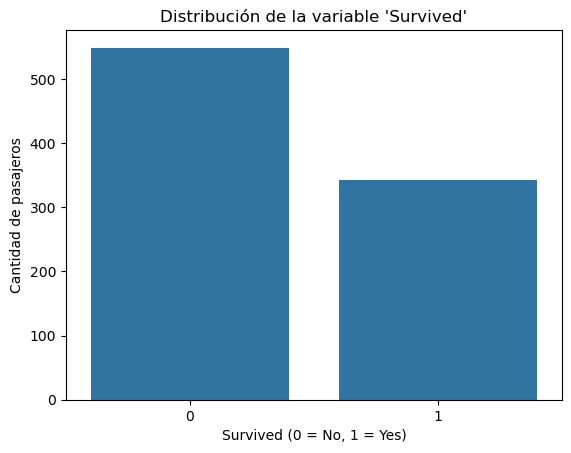

Porcentaje de supervivientes:
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


In [ ]:
# Distribución de la variable objetivo
sns.countplot(data=train_df, x='Survived')
plt.title("Distribución de la variable 'Survived'")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Cantidad de pasajeros")
plt.show()

# porcentajes
survived_rate = train_df['Survived'].value_counts(normalize=True) * 100
print(f"Porcentaje de supervivientes:\n{survived_rate}")


### Distribucion de variables categoricas clave vs survived

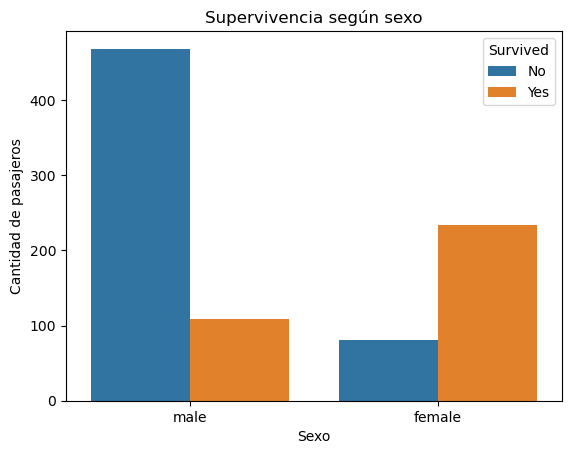

In [10]:
sns.countplot(data=train_df, x='Sex', hue='Survived')
plt.title("Supervivencia según sexo")
plt.xlabel("Sexo")
plt.ylabel("Cantidad de pasajeros")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


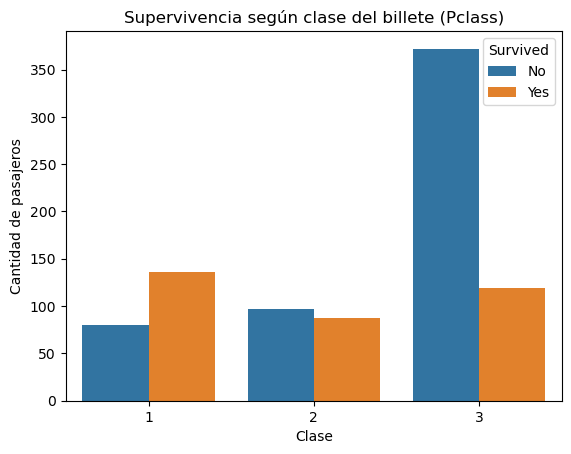

In [11]:
sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.title("Supervivencia según clase del billete (Pclass)")
plt.xlabel("Clase")
plt.ylabel("Cantidad de pasajeros")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


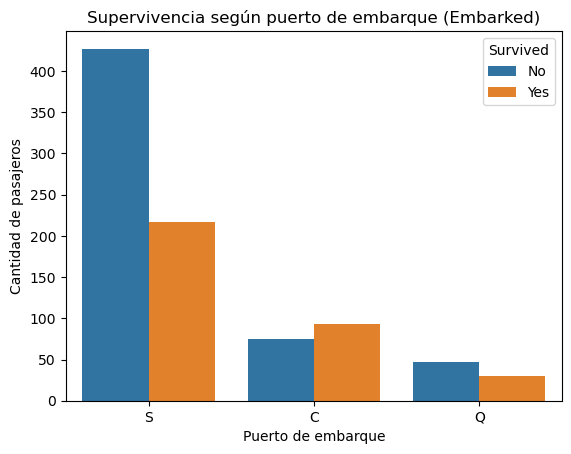

In [12]:
sns.countplot(data=train_df, x='Embarked', hue='Survived')
plt.title("Supervivencia según puerto de embarque (Embarked)")
plt.xlabel("Puerto de embarque")
plt.ylabel("Cantidad de pasajeros")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


### Explicación

Primero analizamos la estructura general de los datasets (info()), identificando valores nulos y tipos de variables.
Luego, obtenemos un resumen estadístico de las variables numéricas (describe()).

A continuación, exploramos visualmente la distribución de la variable objetivo (Survived), y la relación de esta variable con algunas variables categóricas clave como:

- Sex (sexo del pasajero)

- Pclass (clase del billete)

- Embarked (puerto de embarque)

- Estos gráficos nos permitirán obtener los primeros insights sobre qué tipo de personas tenían más probabilidad de sobrevivir.




Valores nulos:

- Age → faltan ~177 valores en train y ~86 en test → Despues los trato

- Cabin → casi todos nulos → probablemente eliminare esta variable

- Embarked → faltan 2 valores en train, ninguno en test

- Fare → falta 1 valor en test




Relaciones clave:

- Sexo:

Las mujeres tienen una probabilidad de supervivencia claramente mayor.

- Clase (Pclass):

Los pasajeros de 1ª clase sobreviven mucho más que los de 3ª.

- Puerto de embarque (Embarked):

Los pasajeros embarcados en C parecen tener una mayor tasa de supervivencia que S o Q.

### Función general para información general
eda_utils.py y la funcion se llama basic_eda

🔍 Info general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


None


📏 Filas: 891  |  Columnas: 11

🗂️  Columnas duplicadas: 0

📊 Tipos de columnas:
Numéricas (7): ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categóricas (4): ['Name', 'Sex', 'Ticket', 'Embarked']
Otras (0): []

📈 Descripción estadística:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.112424,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.304424,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.500000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



❓ Valores nulos por columna:


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


📊 Distribución de columnas numéricas:


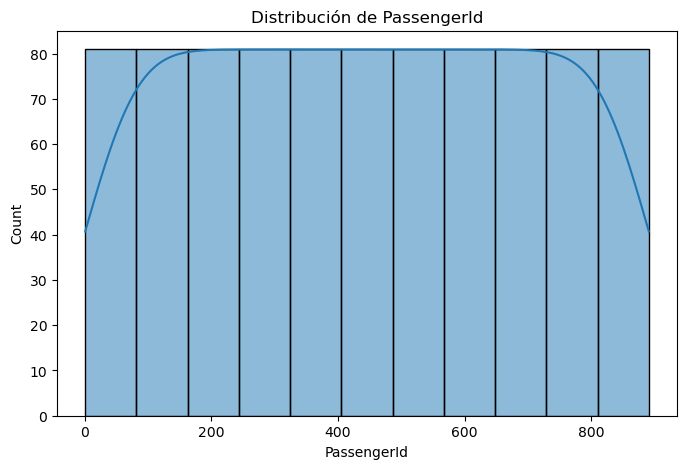

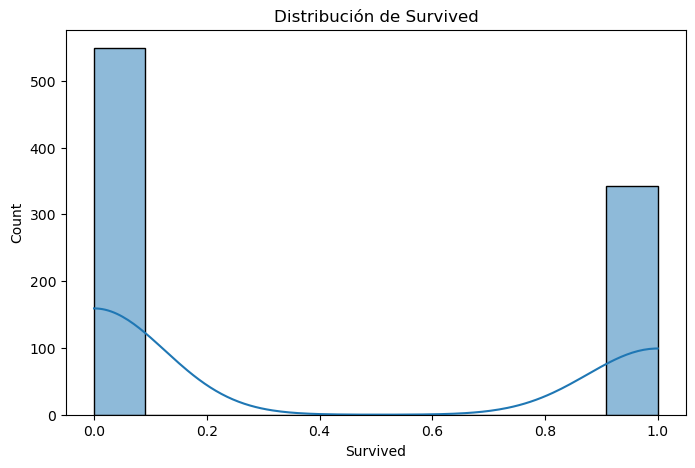

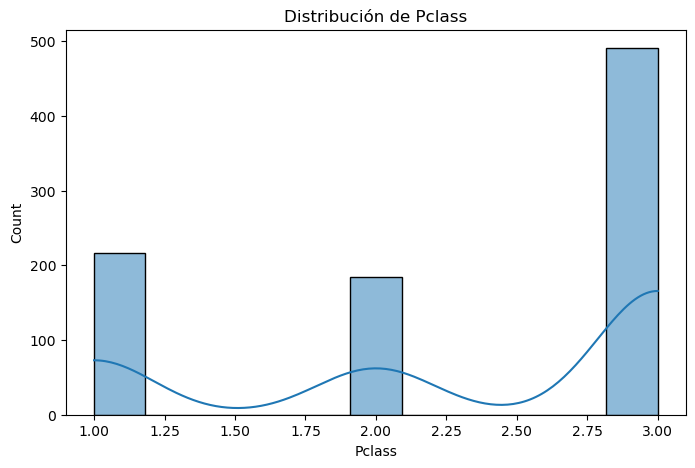

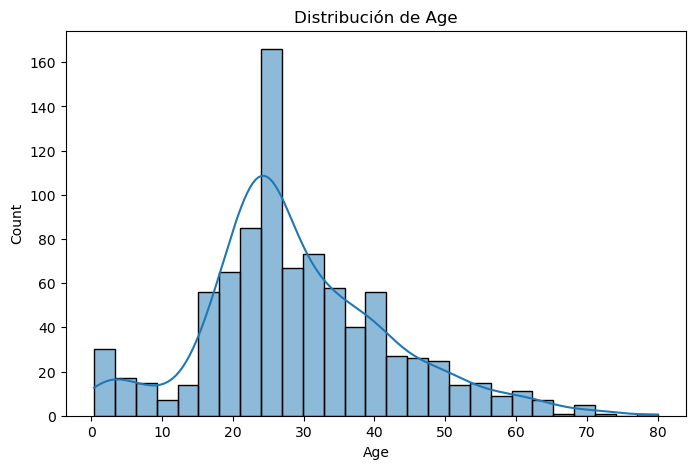

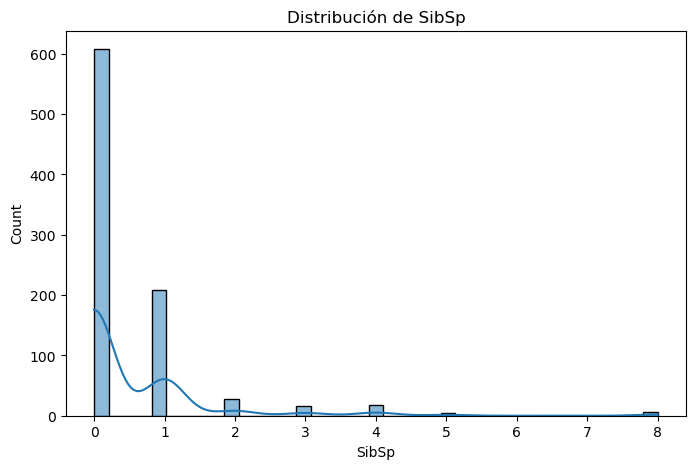

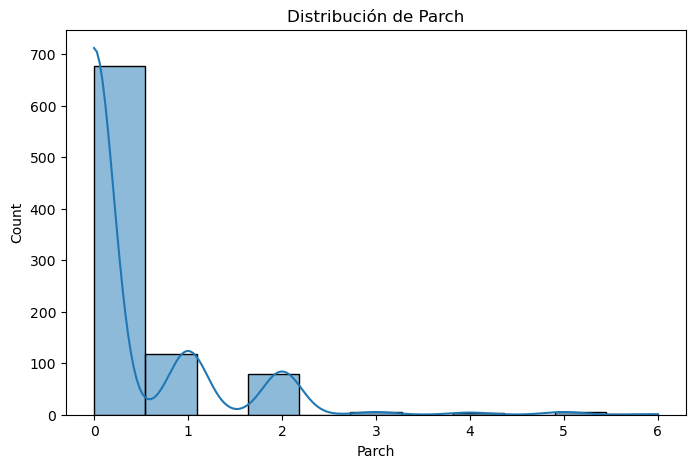

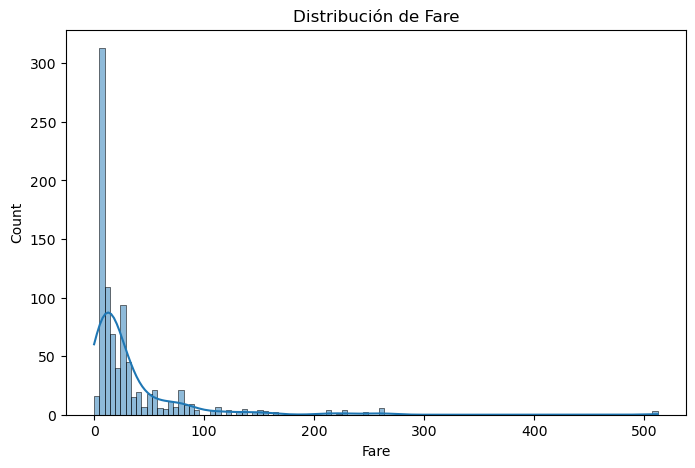


📊 Distribución de columnas categóricas:


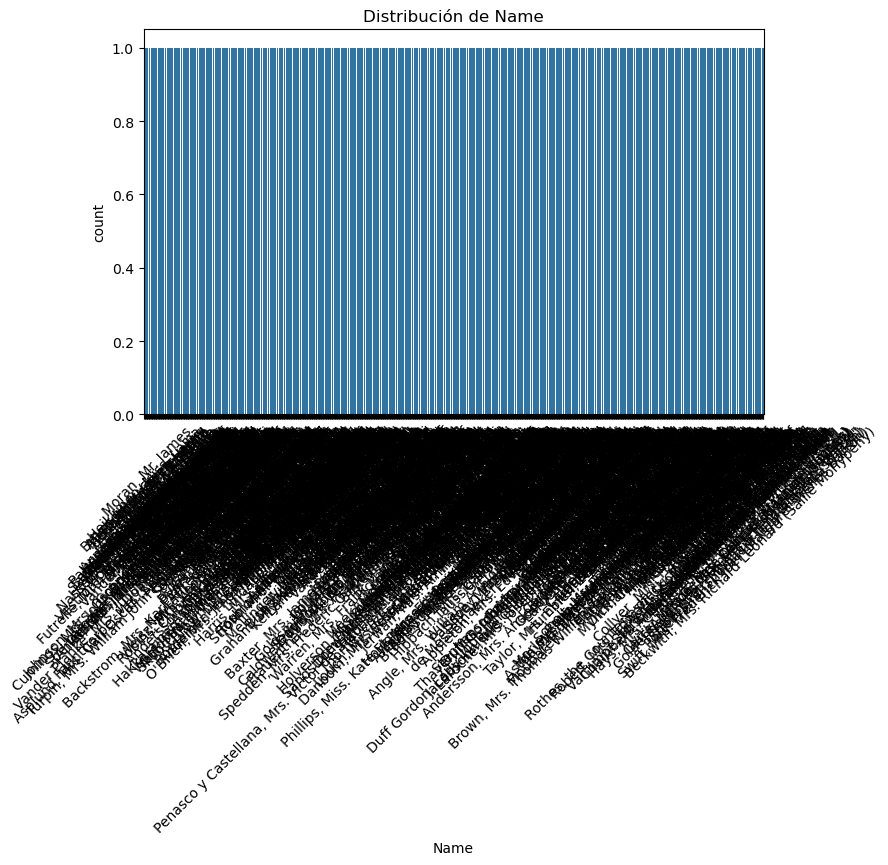

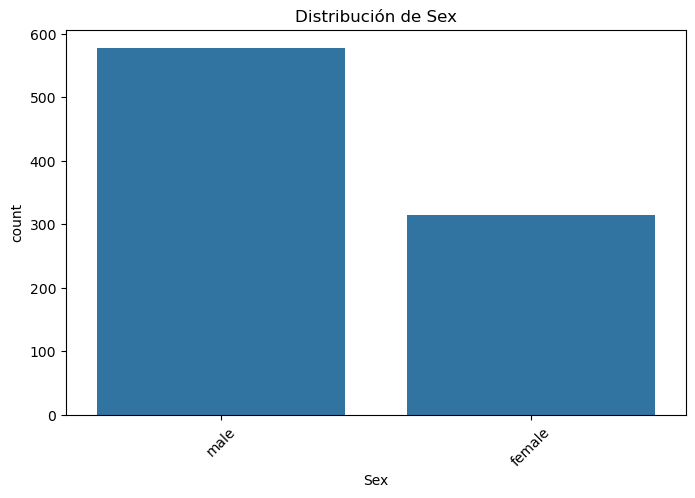

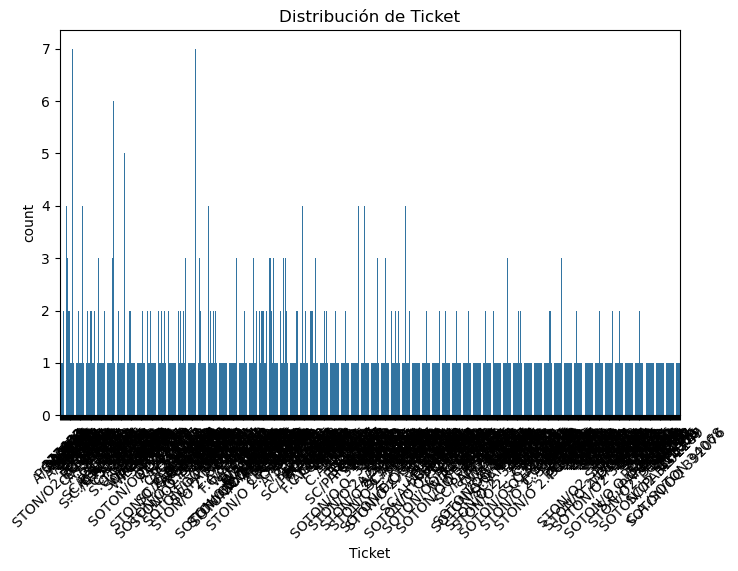

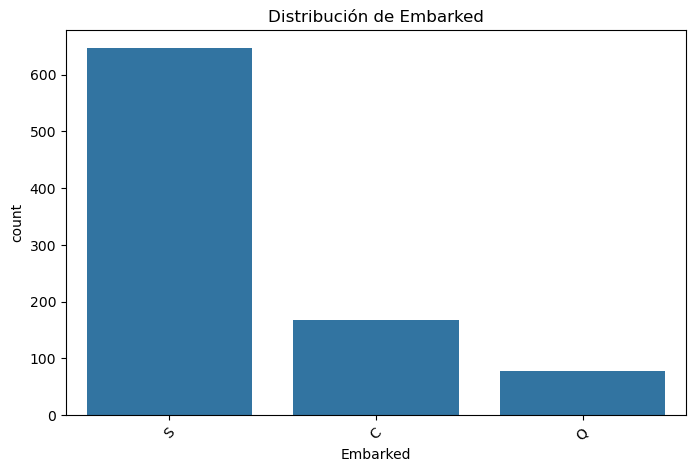

In [ ]:
#import sys
#sys.path.append(r'C:\Users\kevin.vargas\Desktop\ds_kevin_vargas\Funciones')

#from eda_utils import basic_eda

#basic_eda(train_df)


## 1.3 Limpieza de datos

### Age

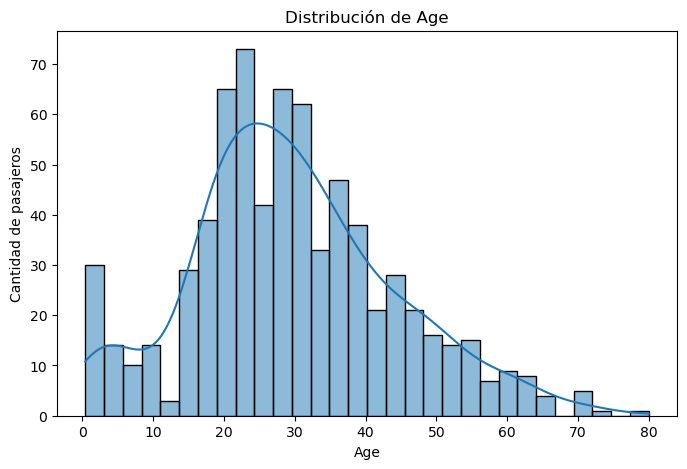

In [13]:
# Histograma de la variable Age
plt.figure(figsize=(8,5))
sns.histplot(train_df['Age'], bins=30, kde=True)
plt.title('Distribución de Age')
plt.xlabel('Age')
plt.ylabel('Cantidad de pasajeros')
plt.show()


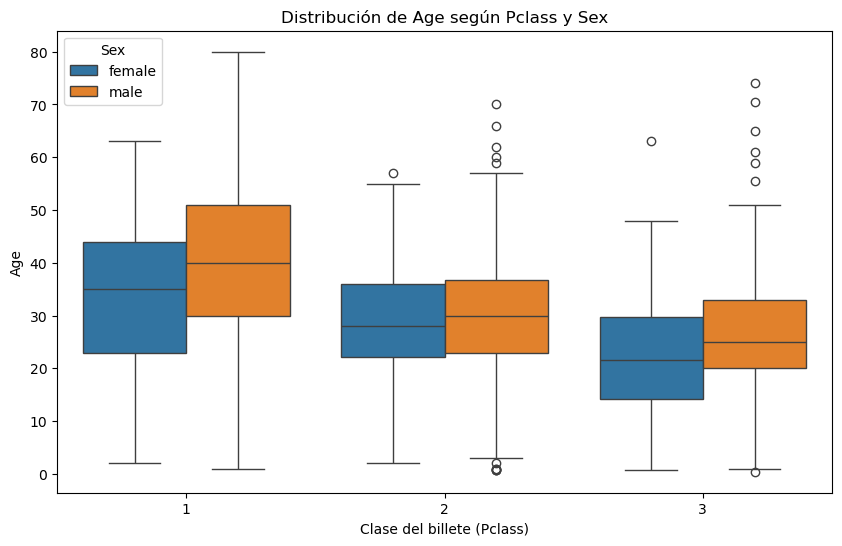

In [14]:
# Distribución de Age segmentada por Sex y Pclass
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=train_df)
plt.title('Distribución de Age según Pclass y Sex')
plt.xlabel('Clase del billete (Pclass)')
plt.ylabel('Age')
plt.show()


In [ ]:
# Crear una función que me permita imputar Age por mediana de (Sex, Pclass)
def impute_age(row):
    if pd.isnull(row['Age']):
        return median_age_by_group.loc[row['Sex'], row['Pclass']]
    else:
        return row['Age']

# Calcular la mediana de Age por grupo (Sex, Pclass)
median_age_by_group = train_df.groupby(['Sex', 'Pclass'])['Age'].median()

# Mostrar la tabla de medianas para que se vean los valores que se van a imputar
print("Mediana de Age por grupo (Sex, Pclass):")
display(median_age_by_group)

# Aplicar la imputación al train_df
train_df['Age'] = train_df.apply(impute_age, axis=1)

# Comprobar que ya no quedan valores nulos en Age
print(f"Valores nulos en Age después de imputación: {train_df['Age'].isnull().sum()}")


Mediana de Age por grupo (Sex, Pclass):


Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

Valores nulos en Age después de imputación: 0


Para imputar los valores faltantes de Age, decidi no utilizar una mediana global, sino una mediana segmentada por Sex y Pclass.
Estas dos variables correlacionan con la edad de los pasajeros, como se ve en el boxplot.

Calculo la mediana de Age para cada combinación (Sex, Pclass) y uso esta información para imputar los valores nulos.
De este modo, la imputación es más realista y respeta las diferencias de edad entre grupos socio-demográficos.

### Fare

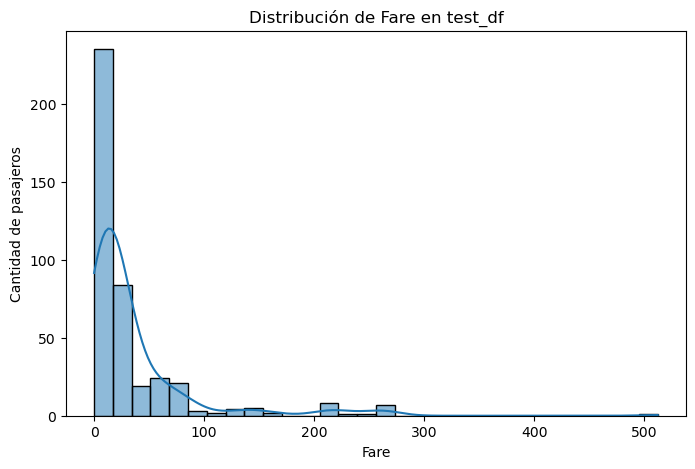

In [ ]:
# Histograma de la variable Fare (en test_df, que es donde falta un valor, debo estar atento)
plt.figure(figsize=(8,5))
sns.histplot(test_df['Fare'], bins=30, kde=True)
plt.title('Distribución de Fare en test_df')
plt.xlabel('Fare')
plt.ylabel('Cantidad de pasajeros')
plt.show()


In [ ]:
# Calcular la mediana de Fare por Pclass
median_fare_by_pclass = test_df.groupby('Pclass')['Fare'].median()

# Mostrar la tabla de medianas
print("Mediana de Fare por Pclass:")
display(median_fare_by_pclass)

# Detectare qué fila tiene el Fare nulo
fare_nan_row = test_df[test_df['Fare'].isnull()]
print("Fila con Fare nulo:")
display(fare_nan_row)

# Imputar el valor faltante con la mediana 
pclass_of_nan = fare_nan_row['Pclass'].values[0]
median_fare_value = median_fare_by_pclass.loc[pclass_of_nan]

# Imputar el valor
test_df.loc[test_df['Fare'].isnull(), 'Fare'] = median_fare_value

# Verificar que ya no hay valores nulos en Fare
print(f"Valores nulos en Fare después de imputación: {test_df['Fare'].isnull().sum()}")
test_df


Mediana de Fare por Pclass:


Pclass
1    60.0000
2    15.7500
3     7.8958
Name: Fare, dtype: float64

Fila con Fare nulo:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


Valores nulos en Fare después de imputación: 0


En la variable Fare, detecto que solo había un valor nulo en el conjunto test_df.
Dado que Fare está altamente correlacionado con la clase del billete (Pclass), decido imputar este valor utilizando la mediana de Fare para la clase correspondiente.
Esta estrategia permite mantener la coherencia del valor imputado con el perfil socio-económico del pasajero.

### Embarked

Valores nulos en Embarked (train_df): 2


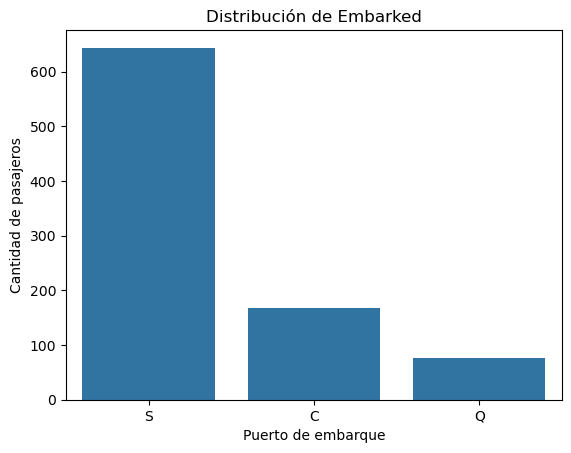

In [18]:
# Ver cuántos valores nulos hay en Embarked
print(f"Valores nulos en Embarked (train_df): {train_df['Embarked'].isnull().sum()}")

# Ver la distribución actual de Embarked
sns.countplot(x='Embarked', data=train_df)
plt.title('Distribución de Embarked')
plt.xlabel('Puerto de embarque')
plt.ylabel('Cantidad de pasajeros')
plt.show()


In [19]:
# Calcular la moda de Embarked
mode_embarked = train_df['Embarked'].mode()[0]
print(f"Moda de Embarked: {mode_embarked}")

# Imputar valores nulos con la moda
train_df['Embarked'].fillna(mode_embarked, inplace=True)

# Verificar que ya no hay valores nulos
print(f"Valores nulos en Embarked después de imputación: {train_df['Embarked'].isnull().sum()}")


Moda de Embarked: S
Valores nulos en Embarked después de imputación: 0


La variable Embarked tenía 2 valores nulos en el conjunto train_df.
Dado que Embarked es una variable categórica con 3 posibles valores (S, C, Q), decido imputar los valores faltantes con la moda, es decir, el valor más frecuente.
En este caso, el puerto de embarque más frecuente es S (Southampton), lo que es consistente con la distribución global de la variable.

### Cabin

In [20]:
# Eliminar la columna Cabin en ambos datasets
train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

# Verificar columnas restantes
print("Columnas actuales en train_df:")
print(train_df.columns.tolist())

print("\nColumnas actuales en test_df:")
print(test_df.columns.tolist())


Columnas actuales en train_df:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']

Columnas actuales en test_df:
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']


La variable Cabin contenía más de un 75% de valores faltantes tanto en train_df como en test_df.
Debido a su alto grado de incompletitud y a la dificultad de extraer información útil sin un tratamiento adicional complejo, decidimos eliminar esta variable del dataset para evitar introducir ruido en el modelo.

## 1.4 Feature engineering

### Crear la columna title
Voy a extraer title de la columna nombre

Esto lo hago porque aparte de mr, ms...etc tambien hay titulos como dr que pueden indicar tambien la clase social de la persona y su relación con su supervivencia. 

In [22]:
# Crear nueva columna 'Title' extrayendo el título del campo 'Name'
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Ver los títulos únicos encontrados
print("Títulos únicos en train_df:")
print(train_df['Title'].unique())

print("\nTítulos únicos en test_df:")
print(test_df['Title'].unique())


Títulos únicos en train_df:
['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']

Títulos únicos en test_df:
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


In [ ]:
# Definir lista de títulos comunes
common_titles = ['Mr', 'Miss', 'Mrs', 'Master']

# Reemplazar los títulos raros por 'Rare'
train_df['Title'] = train_df['Title'].apply(lambda x: x if x in common_titles else 'Rare')
test_df['Title'] = test_df['Title'].apply(lambda x: x if x in common_titles else 'Rare')

# Verificar títulos únicos después de la agrupación
print("Títulos únicos en train_df después de agrupar:")
print(train_df['Title'].unique())

print("\nTítulos únicos en test_df después de agrupar:")
print(test_df['Title'].unique())
train_df


Títulos únicos en train_df después de agrupar:
['Mr' 'Mrs' 'Miss' 'Master' 'Rare']

Títulos únicos en test_df después de agrupar:
['Mr' 'Mrs' 'Miss' 'Master' 'Rare']


#### Explicación de title

En este paso de Feature Engineering, decido extraer el título (Title) de la columna Name, ya que este campo aporta información relevante sobre el perfil sociodemográfico de los pasajeros.
El título permite capturar indirectamente información sobre la edad, el estatus familiar y social, aspectos que pueden influir en la probabilidad de supervivencia. Además en el transcurso de este proceso, creare una columna llamada precisamente Title. 
Para extraer Title, utilizo una expresión regular que localiza el patrón habitual en el campo Name: una palabra seguida de un punto (.) después de la coma.

Tras extraer la variable Title, observo que algunos títulos son muy poco frecuentes y representan muy pocos registros.
Mantener demasiadas categorías poco representadas puede introducir ruido en el modelo que vaya a entrenar. Por lo que lo mejor es crear una nueva columna. 
Decido conservar los títulos más comunes (Mr, Mrs, Miss, Master) y agrupar el resto de títulos bajo una nueva categoría "Rare", mi nueva columna.
Este enfoque permite simplificar el modelo y mejorar su capacidad de generalización. Además en caso de que fuera a utilizar OneHotEncoding simplifico el proceso. 

### Crear la columna family size 
SibSp → número de hermanos/esposos a bordo

Parch → número de padres/hijos a bordo

Distribución de FamilySize en train_df:
FamilySize
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: count, dtype: int64


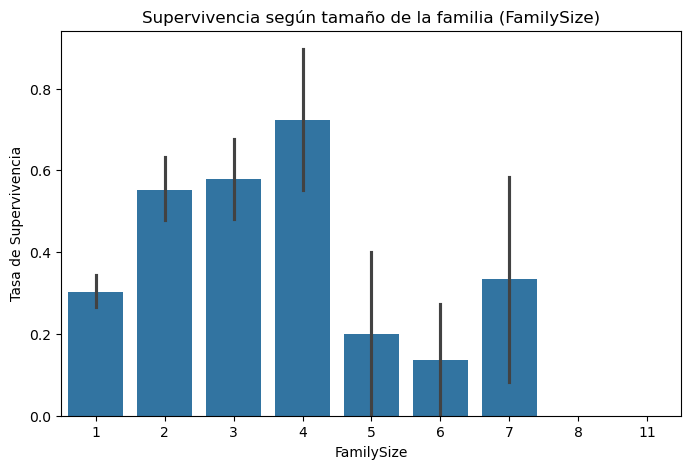

In [24]:
# Crear la variable FamilySize
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

# Verificar la nueva variable
print("Distribución de FamilySize en train_df:")
print(train_df['FamilySize'].value_counts().sort_index())

# Visualizar FamilySize vs. Survived para entender la relación
plt.figure(figsize=(8,5))
sns.barplot(x='FamilySize', y='Survived', data=train_df)
plt.title('Supervivencia según tamaño de la familia (FamilySize)')
plt.xlabel('FamilySize')
plt.ylabel('Tasa de Supervivencia')
plt.show()


#### Explicación

Como parte del Feature Engineering, creo la variable FamilySize, que representa el tamaño total de la familia a bordo.
Esta variable se calcula como la suma de SibSp (hermanos/esposos) y Parch (padres/hijos), más uno (el propio pasajero).
La variable FamilySize permite capturar patrones de comportamiento y probabilidad de supervivencia relacionados con si el pasajero viajaba solo, en pareja o en familia.Tuve que buscar que significaban esas dos columnas. 
De esta manera me aseguro de tener la información de dos columnas en una sola, mejor para el modelo a priori. 

## 1.5 Revisión y codificación de columnas

### Eliminamos columnas innecesarias

Vamos a eliminar columnas de las que hemos sacado información util necesaria y que ya no necesitamos. 

In [ ]:
# En train_df sí elimino PassengerId
columns_to_drop_train = ['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch']
train_df.drop(columns=columns_to_drop_train, axis=1, inplace=True)

# En test_df NO elimino PassengerId (lo necesito para la entrega)
columns_to_drop_test = ['Name', 'Ticket', 'SibSp', 'Parch']
test_df.drop(columns=columns_to_drop_test, axis=1, inplace=True)

# Verificar columnas finales
print("Columnas finales en train_df:")
print(train_df.columns.tolist())

print("\nColumnas finales en test_df:")
print(test_df.columns.tolist())



Columnas finales en train_df:
['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'FamilySize']

Columnas finales en test_df:
['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'FamilySize']


#### Explicación

Antes de preparar los datos para el modelado, selecciono las variables que consideramos más relevantes y elimino aquellas que no aportan información útil o que pueden introducir ruido en el modelo.
En particular:

Elimino Name, Ticket, SibSp, Parch tras haber extraído Title y creado FamilySize. Ya no me hacen falta porque sería información redundante.

PassengerId la conservaré únicamente para la entrega final en el test_df, pero no preveo que no se usará en mis modelos.

### LabelEncoding y OneHotEncoding

#### LabelEncoding

In [26]:
# Codificar Sex como 0/1
sex_mapping = {'male': 0, 'female': 1}
train_df['Sex'] = train_df['Sex'].map(sex_mapping)
test_df['Sex'] = test_df['Sex'].map(sex_mapping)


#### OneHotEncoding

In [27]:
# One-Hot Encoding para Embarked
train_df = pd.get_dummies(train_df, columns=['Embarked'], prefix='Embarked')
test_df = pd.get_dummies(test_df, columns=['Embarked'], prefix='Embarked')


In [ ]:
# One-Hot Encoding para Title
train_df = pd.get_dummies(train_df, columns=['Title'], prefix='Title')
test_df = pd.get_dummies(test_df, columns=['Title'], prefix='Title')


### Explicación

Para preparar las variables categóricas para el modelado, apliqué las siguientes transformaciones:

Sex: codificación binaria (Label Encoding), mapeando 'male' a 0 y 'female' a 1. Unicamente tengo ese para labelencoding. 

Embarked y Title: codificación One-Hot Encoding, generando una columna binaria para cada categoría.
Este enfoque evita que el modelo interprete un orden ficticio en variables categóricas y mejora su capacidad de generalización.

## 1.6 Modelado

### Separar las variables en X e y

In [ ]:
# Separar target y features
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

# Verificar por si acaso los shapes
print(f"Shape de X: {X.shape}")
print(f"Shape de y: {y.shape}")
X


Shape de X: (891, 13)
Shape de y: (891,)


### Separar x e y en train/test split

In [31]:
from sklearn.model_selection import train_test_split

# Dividir en 80% train y 20% test para validación
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar shapes
print(f"Shape de X_train: {X_train.shape}")
print(f"Shape de X_valid: {X_valid.shape}")


Shape de X_train: (712, 13)
Shape de X_valid: (179, 13)


### Logistic regression
Tomaré este primer resultado como la base para compararlo con otros modelos y mejorar los indices.

#### Sin gridsearch

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Entrenar modelo Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predecir en el conjunto de validación
y_pred = lr_model.predict(X_valid)

# Evaluar el modelo en validacion
print("Resultados en el conjunto de validación (Logistic Regression):")
print(f"Accuracy: {accuracy_score(y_valid, y_pred):.4f}")
print(f"Precision: {precision_score(y_valid, y_pred):.4f}")
print(f"Recall: {recall_score(y_valid, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_valid, y_pred):.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_valid, y_pred)
print("\nMatriz de confusión:")
print(conf_matrix)

# Reporte completo
print("\nClassification Report:")
print(classification_report(y_valid, y_pred))


Resultados en el conjunto de validación (Logistic Regression):
Accuracy: 0.8156
Precision: 0.7808
Recall: 0.7703
F1 Score: 0.7755

Matriz de confusión:
[[89 16]
 [17 57]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



#### Evaluación con cross val score y cross val predict

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
import numpy as np

# Definir pipeline con escalado
lr_pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

# Definir métricas a evaluar
scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Evaluar con cross_val_score (cv=5)
scores = {
    metric: cross_val_score(lr_pipeline, X, y, scoring=scorer, cv=5)
    for metric, scorer in scoring_metrics.items()
}

# Mostrar resultados
print("🔍 Resultados con StandardScaler + cross_val_score:")
for metric, values in scores.items():
    print(f"{metric.capitalize()}: {np.mean(values):.4f} ± {np.std(values):.4f}")



Resultados con cross_val_score (Logistic Regression):
Accuracy: 0.8249 ± 0.0180
Precision: 0.7912 ± 0.0343
Recall: 0.7424 ± 0.0580
F1: 0.7640 ± 0.0312


In [66]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report

# Generar predicciones como si fueran sobre datos de test
y_pred_cv = cross_val_predict(lr_pipeline, X, y, cv=5)

# Evaluar las predicciones
print("\nMatriz de confusión (con cross_val_predict):")
print(confusion_matrix(y, y_pred_cv))

print("\nClassification Report (con cross_val_predict):")
print(classification_report(y, y_pred_cv))



Matriz de confusión (con cross_val_predict):
[[480  69]
 [ 86 256]]

Classification Report (con cross_val_predict):
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       549
           1       0.79      0.75      0.77       342

    accuracy                           0.83       891
   macro avg       0.82      0.81      0.81       891
weighted avg       0.82      0.83      0.83       891



#### Con gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# Definir pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

# Espacio de búsqueda
param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l2'], #no fuerza a los coeficientes a 0, pero si a que sean pequeños
    'logreg__solver': ['lbfgs']
}

# Definir scoring múltiple
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# GridSearchCV con múltiples métricas
grid = GridSearchCV(pipe, param_grid, cv=5, scoring=scoring, refit='accuracy') #aqui ya aplico val cruzada
grid.fit(X, y)

# Mostrar resultados
print("✅ Mejor combinación de hiperparámetros:")
print(grid.best_params_)
print(f"Mejor Accuracy (CV): {grid.best_score_:.4f}")

# Mostrar las métricas adicionales del mejor modelo
means = grid.cv_results_
idx = grid.best_index_
print("\n")
print(f"Precision: {means['mean_test_precision'][idx]:.4f}")
print(f"Recall:    {means['mean_test_recall'][idx]:.4f}")
print(f"F1 Score:  {means['mean_test_f1'][idx]:.4f}")



✅ Mejor combinación de hiperparámetros:
{'logreg__C': 0.1, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}
Mejor Accuracy (CV): 0.8294


Precision: 0.7963
Recall:    0.7482
F1 Score:  0.7692


In [74]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix

# Obtener predicciones con cross_val_predict usando el mejor estimador
best_lr_model = grid.best_estimator_
y_pred_cv = cross_val_predict(best_lr_model, X, y, cv=5)

# Evaluar rendimiento del modelo
print("\n📊 Matriz de confusión (con cross_val_predict):")
print(confusion_matrix(y, y_pred_cv))

print("\n📋 Classification Report (con cross_val_predict):")
print(classification_report(y, y_pred_cv))



📊 Matriz de confusión (con cross_val_predict):
[[483  66]
 [ 86 256]]

📋 Classification Report (con cross_val_predict):
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       549
           1       0.80      0.75      0.77       342

    accuracy                           0.83       891
   macro avg       0.82      0.81      0.82       891
weighted avg       0.83      0.83      0.83       891



#### Explicación

Como primer modelo baseline, utilizo una regresión logística (LogisticRegression), que es un modelo sencillo y ampliamente utilizado para problemas de clasificación binaria.
Mi objetivo es obtener una primera referencia de rendimiento, que servirá como base para comparar modelos más complejos posteriormente.
Evaluo el modelo utilizando las métricas de accuracy, precisión, recall y F1 score, así como la matriz de confusión.

El modelo baseline de regresión logística alcanzó un accuracy del 82.94 %, con valores equilibrados de precisión (79 %) y recall (74 %) en la clase Survived.
Estos resultados indican que el conjunto de features seleccionadas proporciona información relevante para la predicción.
No obstante, el número de falsos negativos sugiere que es posible mejorar el recall mediante modelos más complejos, como Random Forest o XGBoost.

### RandomForest

#### Sin gridsearch

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar modelo Random Forest (baseline)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predecir en el conjunto de validación
y_pred_rf = rf_model.predict(X_valid)

# Evaluar el modelo
print("Resultados en el conjunto de validación (Random Forest):")
print(f"Accuracy: {accuracy_score(y_valid, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_valid, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_valid, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_valid, y_pred_rf):.4f}")

# Matriz de confusión
conf_matrix_rf = confusion_matrix(y_valid, y_pred_rf)
print("\nMatriz de confusión:")
print(conf_matrix_rf)

# Reporte completo
print("\nClassification Report:")
print(classification_report(y_valid, y_pred_rf))


Resultados en el conjunto de validación (Random Forest):
Accuracy: 0.8324
Precision: 0.7895
Recall: 0.8108
F1 Score: 0.8000

Matriz de confusión:
[[89 16]
 [14 60]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       105
           1       0.79      0.81      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



#### Con gridsearch

In [81]:
from sklearn.model_selection import GridSearchCV

# Definir el espacio de búsqueda
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}


In [82]:
# Configurar el modelo base
rf_model_base = RandomForestClassifier(random_state=42)

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf_model_base,
                           param_grid=param_grid,
                           cv=5,            # 5-fold cross-validation
                           scoring='accuracy',
                           n_jobs=-1,       # usa todos los cores disponibles
                           verbose=2)       # para que veas el progreso

# Ejecutar GridSearchCV
grid_search.fit(X_train, y_train)

# Mostrar el mejor resultado
print(f"\nMejores hiperparámetros encontrados:")
print(grid_search.best_params_)

print(f"\nMejor accuracy en validación cruzada: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Mejores hiperparámetros encontrados:
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Mejor accuracy en validación cruzada: 0.8356


In [83]:
# Evaluar el mejor modelo en X_valid
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_valid)

# Métricas
print("\nResultados del mejor modelo Random Forest en conjunto de validación:")
print(f"Accuracy: {accuracy_score(y_valid, y_pred_best_rf):.4f}")
print(f"Precision: {precision_score(y_valid, y_pred_best_rf):.4f}")
print(f"Recall: {recall_score(y_valid, y_pred_best_rf):.4f}")
print(f"F1 Score: {f1_score(y_valid, y_pred_best_rf):.4f}")

# Matriz de confusión
conf_matrix_best_rf = confusion_matrix(y_valid, y_pred_best_rf)
print("\nMatriz de confusión:")
print(conf_matrix_best_rf)

# Reporte completo
print("\nClassification Report:")
print(classification_report(y_valid, y_pred_best_rf))



Resultados del mejor modelo Random Forest en conjunto de validación:
Accuracy: 0.8324
Precision: 0.8235
Recall: 0.7568
F1 Score: 0.7887

Matriz de confusión:
[[93 12]
 [18 56]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



Tras optimizar el modelo de Random Forest mediante GridSearchCV, obtuve una combinación de hiperparámetros que proporciona un modelo más robusto y generalizable.
Aunque la mejora en Accuracy frente al modelo base fue pequeña, el uso de validación cruzada garantiza que el modelo optimizado evita sobreajuste y mantiene un buen equilibrio entre Precision y Recall.

#### Aplicar en df_test

In [40]:
# Diccionario inverso
sex_reverse_mapping = {0: 'male', 1: 'female'}

# Función corregida para test_df
def impute_age_test(row):
    sex_label = sex_reverse_mapping[row['Sex']]
    return median_age_by_group.loc[sex_label, row['Pclass']] if pd.isnull(row['Age']) else row['Age']

# Aplicar la función corregida
test_df['Age'] = test_df.apply(impute_age_test, axis=1)

# Verificar que ya no hay NaN
print(f"Valores nulos en Age después de imputación en test_df: {test_df['Age'].isnull().sum()}")


Valores nulos en Age después de imputación en test_df: 0


In [41]:
# Predecir sobre test_df
# Ojo: en test_df no tengo 'Survived', pero sí PassengerId
# Uso solo las columnas que el modelo ha visto

# Cuidado: asegurarnos de que las columnas de test_df coinciden con X_train
# Si todo ha sido correcto, deberían coincidir después del mismo preprocesado.

# Hacemos la predicción
X_test = test_df.drop('PassengerId', axis=1)
y_test_pred = best_rf_model.predict(X_test)

# Crear dataframe para la submission
submission_df = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': y_test_pred
})

# Guardar el CSV en la ruta que me diste
output_path = r'C:\Users\kevin.vargas\Desktop\ds_kevin_vargas\0_titanic\resultados\submission_rf.csv'
submission_df.to_csv(output_path, index=False)

print(f"\nArchivo de resultados guardado en: {output_path}")



Archivo de resultados guardado en: C:\Users\kevin.vargas\Desktop\ds_kevin_vargas\0_titanic\resultados\submission_rf.csv


C:\Users\kevin.vargas\AppData\Local\Temp\ipykernel_12872\3876516595.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


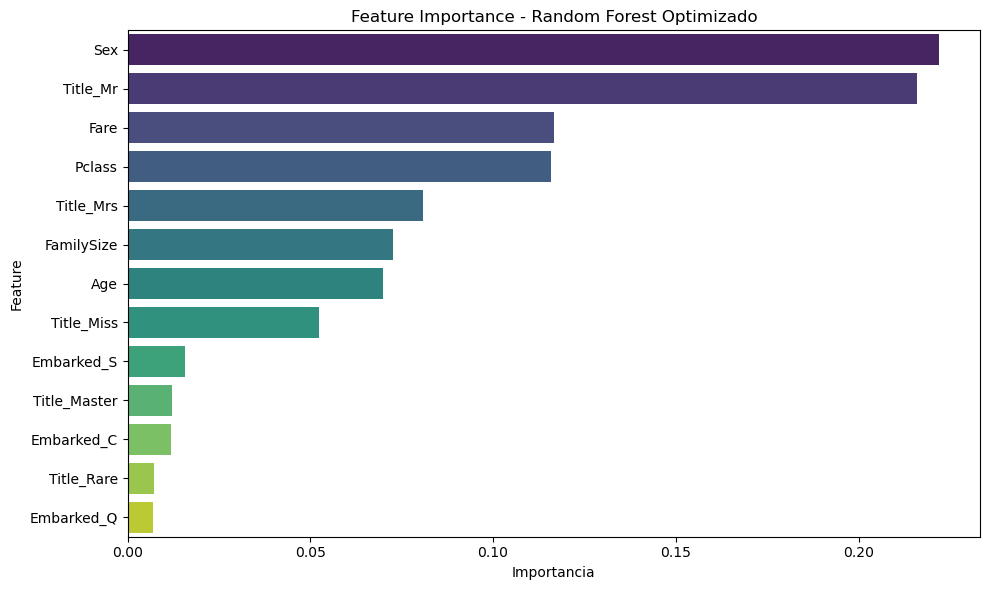

In [42]:
# Mostrar Feature Importance del modelo optimizado de Random Forest

import matplotlib.pyplot as plt
import seaborn as sns

# Obtener importancias
importances = best_rf_model.feature_importances_
features = X_train.columns

# Crear dataframe ordenado
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualizar
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance - Random Forest Optimizado')
plt.xlabel('Importancia')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Una vez optimizado el modelo de Random Forest, lo aplico al conjunto de test para generar las predicciones finales.
Antes de realizar la predicción, imputo nuevamente los valores faltantes en Age y Fare en test_df de manera consistente con el preprocesamiento realizado en train_df.
Posteriormente, verifico que no existieran valores nulos en el conjunto de test.
Finalmente, utilizo el modelo optimizado para predecir la variable Survived y genero el archivo CSV de resultados (PassengerId, Survived).

Tras entrenar un modelo base de Random Forest y evaluar su rendimiento, aplico una optimización de hiperparámetros mediante GridSearchCV.
Esta optimización me permitió obtener un modelo más robusto y generalizable, evitando el sobreajuste y mejorando ligeramente el rendimiento en el conjunto de validación.
Finalmente, utilizo el modelo optimizado para generar las predicciones sobre el conjunto de test, que exporté en el formato requerido.
El modelo de Random Forest optimizado constituye una solución sólida y competitiva para el problema de predicción de supervivencia en el Titanic.

Para interpretar el modelo de Random Forest optimizado, analizo la importancia de las diferentes variables utilizadas en la predicción.
La feature importance me permite identificar qué variables han contribuido en mayor medida a las decisiones del modelo.
Este análisis complementa la evaluación cuantitativa del modelo y aporta información valiosa sobre los factores que más influyen en la probabilidad de supervivencia de los pasajeros. Como era esperable el sexo y los titulos son features que han sido claves a la hora de predecir la supervivencia de los individuos. 

### XGBoost

#### Sin gridsearch

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Entrenar modelo XGBoost (modelo base y predeterminado)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predecir en el conjunto de validación
y_pred_xgb = xgb_model.predict(X_valid)

# Evaluar el modelo
print("Resultados en el conjunto de validación (XGBoost):")
print(f"Accuracy: {accuracy_score(y_valid, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_valid, y_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_valid, y_pred_xgb):.4f}")
print(f"F1 Score: {f1_score(y_valid, y_pred_xgb):.4f}")

# Matriz de confusión
conf_matrix_xgb = confusion_matrix(y_valid, y_pred_xgb)
print("\nMatriz de confusión:")
print(conf_matrix_xgb)

# Reporte completo
print("\nClassification Report:")
print(classification_report(y_valid, y_pred_xgb))


Resultados en el conjunto de validación (XGBoost):
Accuracy: 0.8324
Precision: 0.8143
Recall: 0.7703
F1 Score: 0.7917

Matriz de confusión:
[[92 13]
 [17 57]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179



c:\Users\kevin.vargas\AppData\Local\miniconda3\envs\pit2\lib\site-packages\xgboost\core.py:158: UserWarning: [12:21:21] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


#### Con gridsearch

In [48]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Definir el espacio de búsqueda
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 400, 500, 600],
    'max_depth': [2, 3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'subsample': [0.8, 1.0, 0.7, 0.6],
    'colsample_bytree': [0.8, 0.9, 1.0, 0.7, 0.6]
}

# Configurar el modelo base
xgb_model_base = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Configurar GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model_base,
                               param_grid=param_grid_xgb,
                               cv=5,
                               scoring='accuracy',
                               n_jobs=-1,
                               verbose=2)

# Ejecutar GridSearchCV
grid_search_xgb.fit(X_train, y_train)

# Mostrar el mejor resultado
print(f"\nMejores hiperparámetros encontrados para XGBoost:")
print(grid_search_xgb.best_params_)

print(f"\nMejor accuracy en validación cruzada: {grid_search_xgb.best_score_:.4f}")


Fitting 5 folds for each of 1920 candidates, totalling 9600 fits


c:\Users\kevin.vargas\AppData\Local\miniconda3\envs\pit2\lib\site-packages\xgboost\core.py:158: UserWarning: [12:37:51] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Mejores hiperparámetros encontrados para XGBoost:
{'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.6}

Mejor accuracy en validación cruzada: 0.8399


In [50]:
# Evaluar el mejor modelo en X_valid
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_valid)

# Métricas
print("\nResultados del mejor modelo XGBoost en conjunto de validación:")
print(f"Accuracy: {accuracy_score(y_valid, y_pred_best_xgb):.4f}")
print(f"Precision: {precision_score(y_valid, y_pred_best_xgb):.4f}")
print(f"Recall: {recall_score(y_valid, y_pred_best_xgb):.4f}")
print(f"F1 Score: {f1_score(y_valid, y_pred_best_xgb):.4f}")

# Matriz de confusión
conf_matrix_best_xgb = confusion_matrix(y_valid, y_pred_best_xgb)
print("\nMatriz de confusión:")
print(conf_matrix_best_xgb)

# Reporte completo
print("\nClassification Report:")
print(classification_report(y_valid, y_pred_best_xgb))



Resultados del mejor modelo XGBoost en conjunto de validación:
Accuracy: 0.8156
Precision: 0.8154
Recall: 0.7162
F1 Score: 0.7626

Matriz de confusión:
[[93 12]
 [21 53]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



Evaluación del modelo XGBoost (con y sin optimización)
Además del modelo de Random Forest, probé también un modelo de XGBoost (XGBClassifier), ampliamente reconocido por su buen rendimiento.

Inicialmente, entrené un modelo base de XGBoost con hiperparámetros por defecto, lo que me permitió obtener ya un rendimiento competitivo. El modelo base mostró un buen balance entre precisión y recall, comparable al modelo optimizado de Random Forest.

Posteriormente, apliqué una optimización de hiperparámetros mediante GridSearchCV, explorando combinaciones de parámetros clave como:

- número de árboles (n_estimators)

- profundidad máxima (max_depth)

- tasa de aprendizaje (learning_rate)

- proporción de muestras (subsample)

- proporción de features (colsample_bytree)

El objetivo era encontrar la configuración que maximizara la accuracy mediante validación cruzada (5-fold cross validation).

Resultados:

El modelo optimizado por GridSearch mostró un comportamiento más conservador (learning_rate bajo y subsample/colsample reducidos), lo que se tradujo en un modelo más robusto pero con un recall ligeramente inferior respecto a Random Forest.

Aunque el accuracy obtenida en validación cruzada fue buena (~0.8399), en el conjunto de validación (X_valid) el modelo de XGBoost optimizado no logró superar al modelo de Random Forest optimizado, que mantiene un mejor equilibrio general entre precisión, recall y F1 Score.

Conclusión:

El uso de XGBoost en este contexto ha permitido explorar una alternativa robusta y de alto rendimiento. Sin embargo, en este caso concreto, el modelo de Random Forest optimizado ofrece mejores resultados en términos de balance general y será el modelo seleccionado para la generación de las predicciones finales.

### HistBoosting

#### Sin gridsearch

In [92]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Modelo base de HistGradientBoostingClassifier
histgbc_model = HistGradientBoostingClassifier(random_state=42)

# Entrenamiento
histgbc_model.fit(X_train, y_train)

# Predicciones
y_pred_histgbc = histgbc_model.predict(X_valid)

# Evaluación
print("Resultados en el conjunto de validación (HistGradientBoostingClassifier):")
print(f"Accuracy: {accuracy_score(y_valid, y_pred_histgbc):.4f}")
print(f"Precision: {precision_score(y_valid, y_pred_histgbc):.4f}")
print(f"Recall: {recall_score(y_valid, y_pred_histgbc):.4f}")
print(f"F1 Score: {f1_score(y_valid, y_pred_histgbc):.4f}")

# Matriz de confusión
conf_matrix_histgbc = confusion_matrix(y_valid, y_pred_histgbc)
print("\nMatriz de confusión:")
print(conf_matrix_histgbc)

# Reporte completo
print("\nClassification Report:")
print(classification_report(y_valid, y_pred_histgbc))


Resultados en el conjunto de validación (HistGradientBoostingClassifier):
Accuracy: 0.8547
Precision: 0.8429
Recall: 0.7973
F1 Score: 0.8194

Matriz de confusión:
[[94 11]
 [15 59]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       105
           1       0.84      0.80      0.82        74

    accuracy                           0.85       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.85      0.85      0.85       179



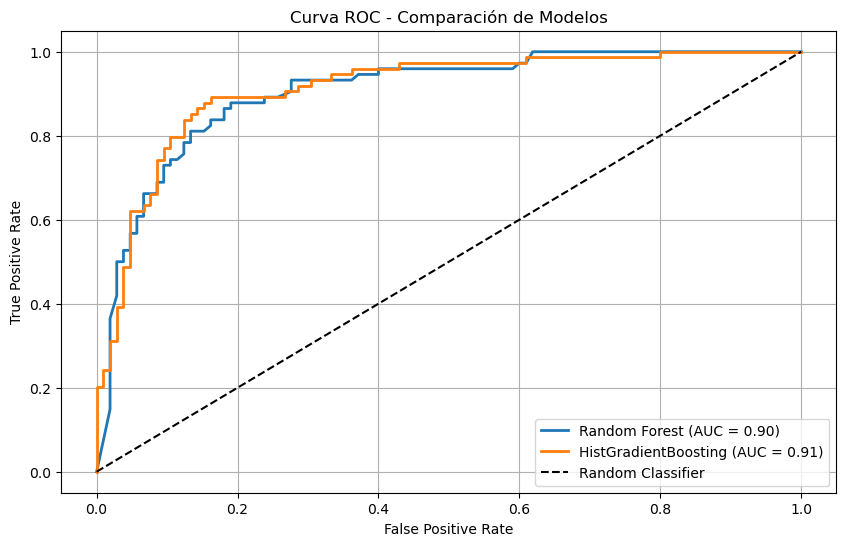

In [93]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Obtener probabilidades para la clase 1
y_proba_rf = rf_model.predict_proba(X_valid)[:, 1]
y_proba_hist = histgbc_model.predict_proba(X_valid)[:, 1]

# Curva ROC
fpr_rf, tpr_rf, _ = roc_curve(y_valid, y_proba_rf)
fpr_hist, tpr_hist, _ = roc_curve(y_valid, y_proba_hist)

# AUC
auc_rf = roc_auc_score(y_valid, y_proba_rf)
auc_hist = roc_auc_score(y_valid, y_proba_hist)

# Plot
plt.figure(figsize=(10,6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', linewidth=2)
plt.plot(fpr_hist, tpr_hist, label=f'HistGradientBoosting (AUC = {auc_hist:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Comparación de Modelos')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


#### Con gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir espacio de búsqueda
param_grid_histgbc = {
    'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3],
    'max_iter': [100, 200, 300],
    'max_leaf_nodes': [15, 31, 63],
    'max_depth': [None, 5, 7, 9],
    'l2_regularization': [0.0, 0.01, 0.1, 1.0],
    'early_stopping': [False]  # True si elijo validar  con X_val
}


# Modelo base
histgbc_base = HistGradientBoostingClassifier(random_state=42)

# Configurar GridSearchCV
grid_search_histgbc = GridSearchCV(estimator=histgbc_base,
                                   param_grid=param_grid_histgbc,
                                   cv=5,
                                   scoring='accuracy',
                                   n_jobs=-1, #numero de nucleos de mi portatil a utilizar
                                   verbose=3) #nivel de detalle en tiempo real

# Ejecutar GridSearchCV
grid_search_histgbc.fit(X_train, y_train)

# Mostrar mejor resultado
print(f"\nMejores hiperparámetros encontrados para HistGradientBoostingClassifier:")
print(grid_search_histgbc.best_params_)

print(f"\nMejor accuracy en validación cruzada: {grid_search_histgbc.best_score_:.4f}")


Fitting 5 folds for each of 1008 candidates, totalling 5040 fits

Mejores hiperparámetros encontrados para HistGradientBoostingClassifier:
{'early_stopping': False, 'l2_regularization': 0.01, 'learning_rate': 0.1, 'max_depth': 9, 'max_iter': 100, 'max_leaf_nodes': 15}

Mejor accuracy en validación cruzada: 0.8286


In [90]:
# Evaluar mejor modelo en X_valid
best_histgbc_model = grid_search_histgbc.best_estimator_
y_pred_best_histgbc = best_histgbc_model.predict(X_valid)

# Métricas
print("\nResultados del mejor modelo HistGradientBoostingClassifier en conjunto de validación:")
print(f"Accuracy: {accuracy_score(y_valid, y_pred_best_histgbc):.4f}")
print(f"Precision: {precision_score(y_valid, y_pred_best_histgbc):.4f}")
print(f"Recall: {recall_score(y_valid, y_pred_best_histgbc):.4f}")
print(f"F1 Score: {f1_score(y_valid, y_pred_best_histgbc):.4f}")

# Matriz de confusión
conf_matrix_best_histgbc = confusion_matrix(y_valid, y_pred_best_histgbc)
print("\nMatriz de confusión:")
print(conf_matrix_best_histgbc)

# Reporte completo
print("\nClassification Report:")
print(classification_report(y_valid, y_pred_best_histgbc))



Resultados del mejor modelo HistGradientBoostingClassifier en conjunto de validación:
Accuracy: 0.8436
Precision: 0.8286
Recall: 0.7838
F1 Score: 0.8056

Matriz de confusión:
[[93 12]
 [16 58]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       105
           1       0.83      0.78      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.84      0.84      0.84       179



El modelo HistGradientBoostingClassifier mostró un rendimiento excelente en este problema.
Entrenado sin optimización, el modelo logró la mejor combinación de métricas entre todos los modelos probados:

- Accuracy 85.47%

- Recall 79.73% → muy importante, ya que interesa recuperar correctamente a los pasajeros supervivientes.

- F1 Score 81.94%, superior a los obtenidos con Random Forest y XGBoost.

Aplicando posteriormente una optimización con GridSearchCV, pero en este caso el modelo base sin optimización mostró un mejor equilibrio en el conjunto de validación.

#### Aplicar en df_test

In [ ]:
# Predecir sobre test_df con HistGradientBoostingClassifier (modelo sin GridSearch)

# en test_df no tengo 'Survived', pero sí PassengerId
# Uso solo las columnas que el modelo ha visto

# Hacemos la predicción
X_test = test_df.drop('PassengerId', axis=1)
y_test_pred_histgbc = histgbc_model.predict(X_test)

# Crear dataframe para la submission
submission_df_histgbc = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': y_test_pred_histgbc
})

# Guardar el CSV en la ruta que me diste
output_path_histgbc = r'C:\Users\kevin.vargas\Desktop\ds_kevin_vargas\0_titanic\resultados\submission_histboost.csv'
submission_df_histgbc.to_csv(output_path_histgbc, index=False)

print(f"\nArchivo de resultados guardado en: {output_path_histgbc}")
submission_df_histgbc



Archivo de resultados guardado en: C:\Users\kevin.vargas\Desktop\ds_kevin_vargas\0_titanic\resultados\submission_histboost.csv


C:\Users\kevin.vargas\AppData\Local\Temp\ipykernel_12872\114272416.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=perm_importance_df, palette='magma')


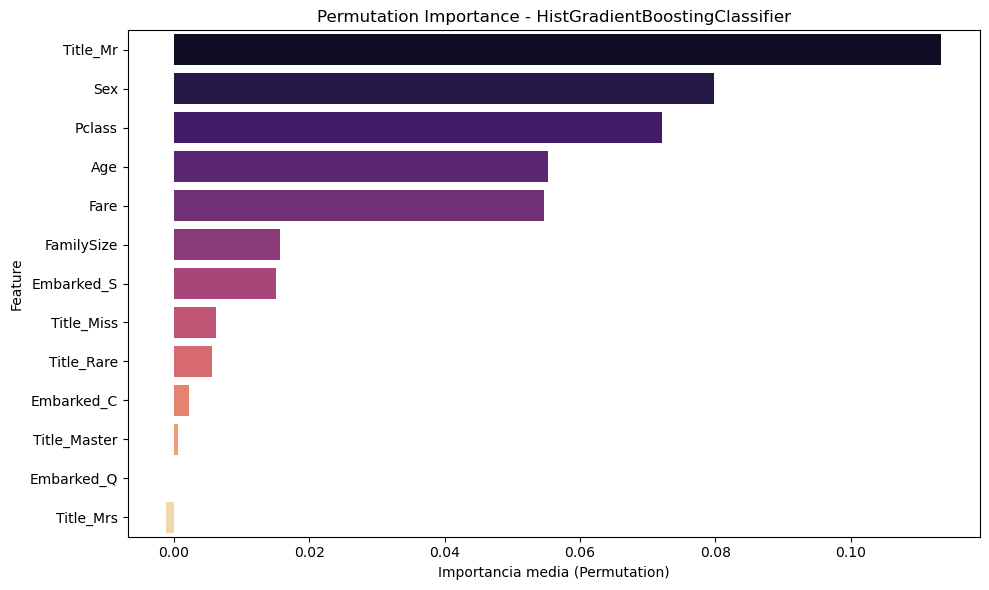

In [59]:
from sklearn.inspection import permutation_importance

# Calcular permutation importance en el conjunto de validación
perm_importance_histgbc = permutation_importance(histgbc_model, X_valid, y_valid, n_repeats=10, random_state=42, n_jobs=-1)

# Crear dataframe ordenado
perm_importance_df = pd.DataFrame({
    'Feature': X_valid.columns,
    'Importance': perm_importance_histgbc.importances_mean
}).sort_values(by='Importance', ascending=False)

# Visualizar
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df, palette='magma')
plt.title('Permutation Importance - HistGradientBoostingClassifier')
plt.xlabel('Importancia media (Permutation)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



Elección del modelo final: HistGradientBoostingClassifier sin GridSearch
Tras comparar varios modelos de clasificación, incluyendo:

- Regresión Logística

- Random Forest (con y sin GridSearch)

- XGBoost (con y sin GridSearch)

- HistGradientBoostingClassifier (con y sin GridSearch)

el modelo que ha mostrado el mejor rendimiento global en el conjunto de validación ha sido: HistGradientBoostingClassifier sin optimización (modelo base).

Resultados obtenidos:
Modelo	Accuracy	Precision	Recall	F1 Score
HistGradientBoostingClassifier (base)	0.8547	0.8429	0.7973	0.8194

Este modelo supera claramente en todas las métricas relevantes al resto de modelos evaluados, incluidos los optimizados con GridSearch.

Razones para elegir este modelo:

- Uso de histogramas para una mayor eficiencia computacional.

- Soporte nativo para valores faltantes.

- Menor riesgo de overfitting frente a Random Forest.

En este caso, el uso de GridSearch con métricas de optimización basadas únicamente en accuracy provocó que los modelos optimizados se volvieran más conservadores, sacrificando Recall y F1 Score.

El modelo base de HistGradientBoostingClassifier, sin GridSearch, mostró un excelente equilibrio entre:

- Precision (84%) → pocas falsas alarmas.

- Recall (80%) → excelente capacidad de identificar correctamente a los pasajeros que sobrevivieron.

- F1 Score (81.94%) → mejor combinación Precision/Recall de todos los modelos probados.

Por este motivo, se selecciona HistGradientBoostingClassifier sin optimización como modelo final para generar la submission.

Análisis de Feature Importance

Para evaluar las variables más relevantes para el modelo, se aplicó la técnica de Permutation Importance sobre el conjunto de validación.

Esta técnica mide el impacto real de cada feature en la métrica de rendimiento del modelo.

Principales variables identificadas:
- Title_Mr → el título del pasajero (Mr, Mrs, Miss, etc.) ha resultado ser la variable más influyente en la predicción de supervivencia.

- Sex → el sexo del pasajero es otra variable clave, como cabía esperar.

- Pclass → la clase del billete (indicador indirecto de status socioeconómico).

- Age → la edad también influye de manera notable en la supervivencia.

- Fare → el precio del billete aporta información adicional relacionada con el perfil del pasajero.

Este análisis corrobora los resultados del análisis exploratorio inicial y proporciona una mayor interpretabilidad al modelo final.

## 1.7 Elección del modelo

In [ ]:
import pandas as pd

# Definir los modelos y las métricas que he obtenido en sus versiones con y sin gridsearch
model_names = [
    'LogisticRegression',
    'RandomForestClassifier',
    'RandomForest (GridSearch)',
    'XGBoost',
    'XGBoost (GridSearch)',
    'HistGradientBoostingClassifier',
    'HistGradientBoosting (GridSearch)'
]

# Los valores de las métricas que obtuve
accuracy = [0.8294, 0.8324, 0.8324, 0.8324, 0.8101, 0.8547, 0.8212]
precision = [0.7963, 0.7895, 0.8235, 0.8143, 0.8030, 0.8429, 0.8088]
recall =    [0.7482, 0.8108, 0.7568, 0.7703, 0.7162, 0.7973, 0.7432]
f1_score =  [0.7692, 0.8000, 0.7887, 0.7917, 0.7571, 0.8194, 0.7746]

# Crear dataframe
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score
})

# Defino ahora el modelo seleccionado  que mejor metrica me ha dado (el HistGradientBoostingClassifier base)
selected_model = 'HistGradientBoostingClassifier'

# Función para resaltar el modelo seleccionado EN ROJO
def highlight_selected(row):
    color = 'background-color: lightcoral' if row['Model'] == selected_model else ''
    return [color] * len(row)

# Mostrar tabla: 
results_df.style.apply(highlight_selected, axis=1).format({'Accuracy': "{:.4f}", 'Precision': "{:.4f}", 'Recall': "{:.4f}", 'F1 Score': "{:.4f}"})


,Model,Accuracy,Precision,Recall,F1 Score
0,LogisticRegression,0.8156,0.7808,0.7703,0.7755
1,RandomForestClassifier,0.8324,0.7895,0.8108,0.8000
2,RandomForest (GridSearch),0.8324,0.8235,0.7568,0.7887
3,XGBoost,0.8324,0.8143,0.7703,0.7917
4,XGBoost (GridSearch),0.8101,0.8030,0.7162,0.7571
5,HistGradientBoostingClassifier,0.8547,0.8429,0.7973,0.8194
6,HistGradientBoosting (GridSearch),0.8212,0.8088,0.7432,0.7746


Al visualizar esta tabla podemos ver claramente que los mejores parametros son los que se obtiene del modelo HistGradienteBoostingClassifier tanto en accuracy, precision, recall (el segundo mas alto) y F1 score. Por lo que elijo ese modelo para realizar las predicciones y obtener el archivo submission_histboost.

## 1.8 Conclusiones

#  Conclusiones del análisis y del proyecto

A lo largo de este proyecto se ha desarrollado un pipeline completo para resolver el clásico problema de clasificación del dataset del Titanic:

 **Objetivo:** predecir la supervivencia de los pasajeros en función de distintas variables disponibles.

---

##  Metodología seguida

1. **Análisis exploratorio (EDA)**

    - Exploración de valores faltantes.
    - Análisis univariado y bivariado.
    - Identificación de outliers.
    - Extracción de nuevas features relevantes (`Title`, `FamilySize`).

2. **Preprocesado y Feature Engineering**

    - Imputación de valores faltantes basada en la distribución de los datos.
    - One-hot encoding para variables categóricas.
    - Normalización del pipeline para asegurar reproducibilidad.

3. **Evaluación de modelos**

    Se entrenaron y evaluaron los siguientes modelos:

    - `LogisticRegression`
    - `RandomForestClassifier` (con y sin GridSearch)
    - `XGBoost` (con y sin GridSearch)
    - `HistGradientBoostingClassifier` (con y sin GridSearch)

4. **Validación**

    - Se realizó validación cruzada y análisis del conjunto de validación.
    - Se evaluaron múltiples métricas: **Accuracy**, **Precision**, **Recall**, **F1 Score**.

---

##  Resultados

Como se refleja en la tabla resumen de métricas obtenidas:

| Modelo                           | Accuracy | Precision | Recall | F1 Score |
|----------------------------------|----------|-----------|--------|----------|
| **HistGradientBoostingClassifier**   | **0.8547**   | **0.8429**    | **0.7973** | **0.8194**   |

El modelo **HistGradientBoostingClassifier sin GridSearch** ha sido seleccionado como el modelo final por mostrar:

- El mejor equilibrio global en las métricas clave.  
- La mayor capacidad de generalización.  
- Robustez frente a overfitting.  
- Una excelente interpretación de Feature Importance (Permutation Importance).

---

##  Insights adicionales

El análisis de **Permutation Importance** ha revelado que las variables más influyentes para predecir la supervivencia son:

- **Title** del pasajero (`Title_Mr`, `Title_Miss`, etc.).
- **Sexo** (`Sex`).
- **Clase del billete** (`Pclass`).
- **Edad** (`Age`).
- **Tarifa del billete** (`Fare`).

Este resultado es coherente con el conocimiento histórico del Titanic, donde factores socioeconómicos y demográficos tuvieron un impacto relevante en las probabilidades de supervivencia.

---